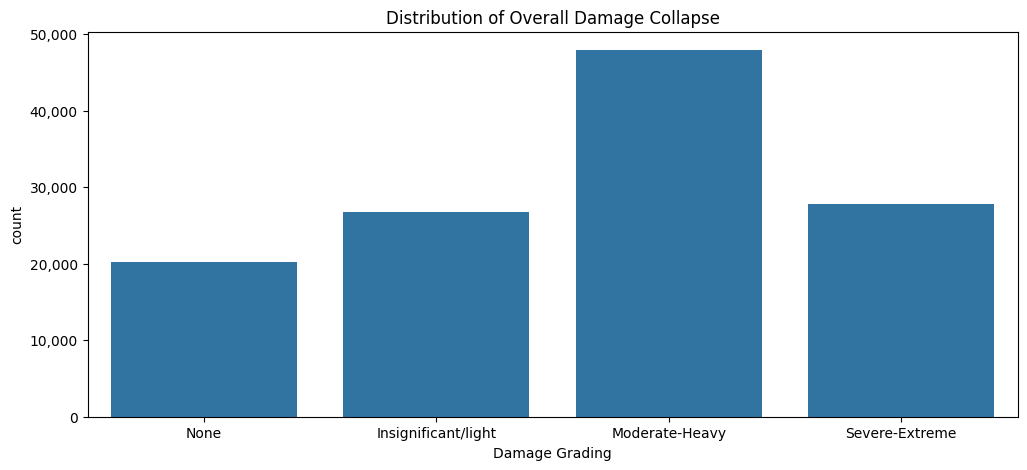

In [37]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='damage_overall_collapse', data=damage, order = ['None', 'Insignificant/light', 'Moderate-Heavy', 'Severe-Extreme'])
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.title("Distribution of Overall Damage Collapse")
plt.xlabel("Damage Grading")
plt.show()

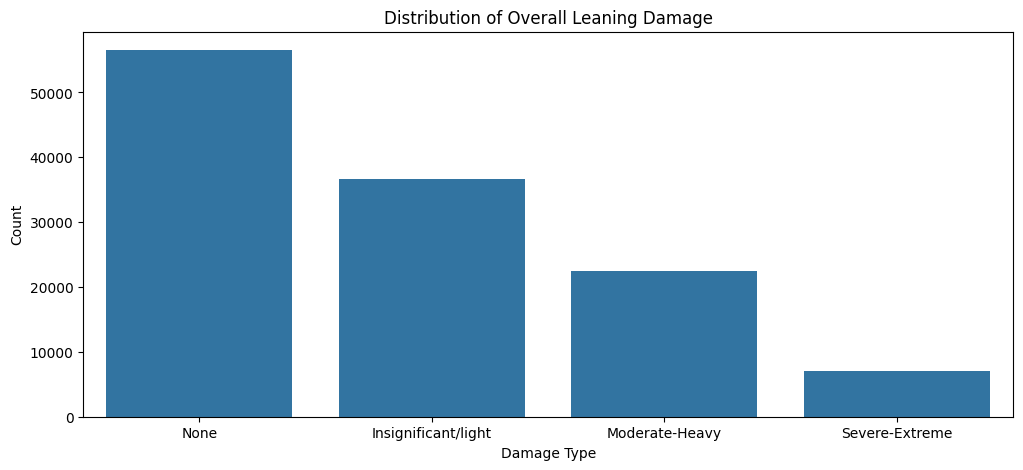

In [38]:
plt.figure(figsize=(12, 5))
sns.countplot(x='damage_overall_leaning', data=damage, order=damage['damage_overall_leaning'].value_counts().index)
plt.title('Distribution of Overall Leaning Damage')
plt.xlabel('Damage Type')
plt.ylabel('Count')
plt.show()

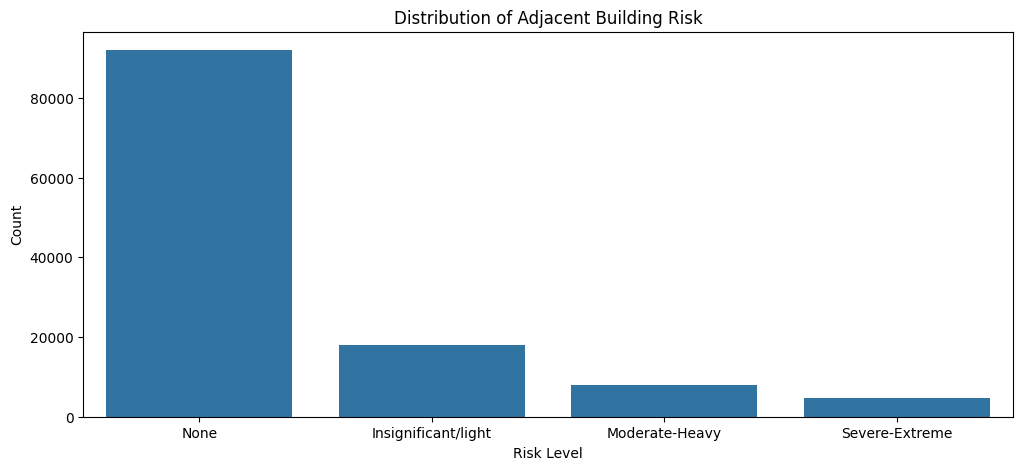

In [39]:
plt.figure(figsize=(12, 5))
sns.countplot(x='damage_overall_adjacent_building_risk', data=damage, order=damage['damage_overall_adjacent_building_risk'].value_counts().index)
plt.title('Distribution of Adjacent Building Risk')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.show()


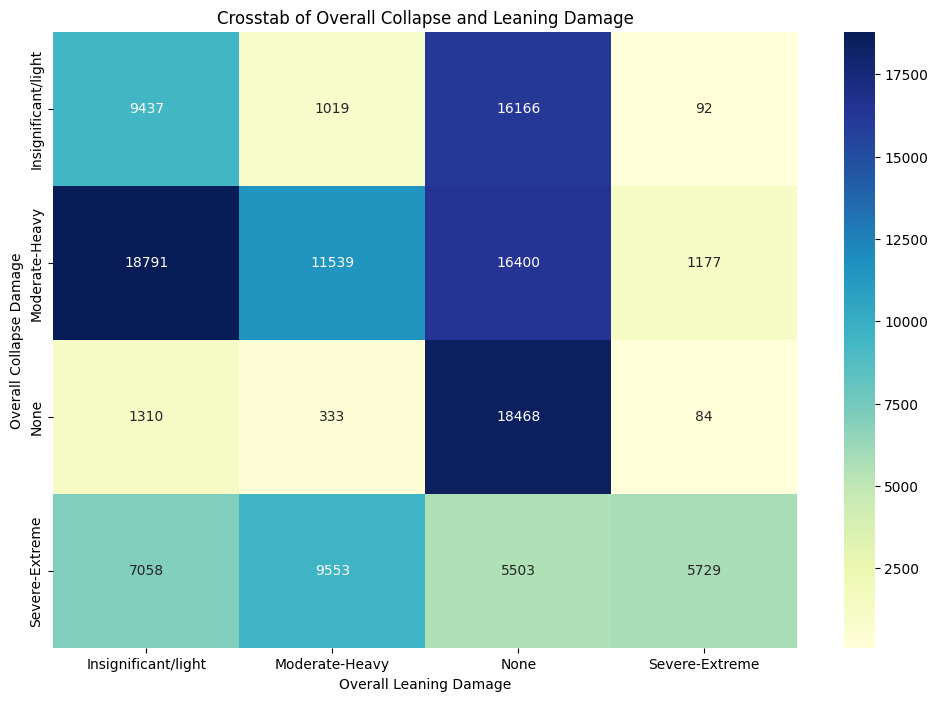

In [40]:
damage_crosstab = pd.crosstab(damage['damage_overall_collapse'], damage['damage_overall_leaning'])

plt.figure(figsize=(12, 8))
sns.heatmap(damage_crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Crosstab of Overall Collapse and Leaning Damage')
plt.xlabel('Overall Leaning Damage')
plt.ylabel('Overall Collapse Damage')
plt.show()


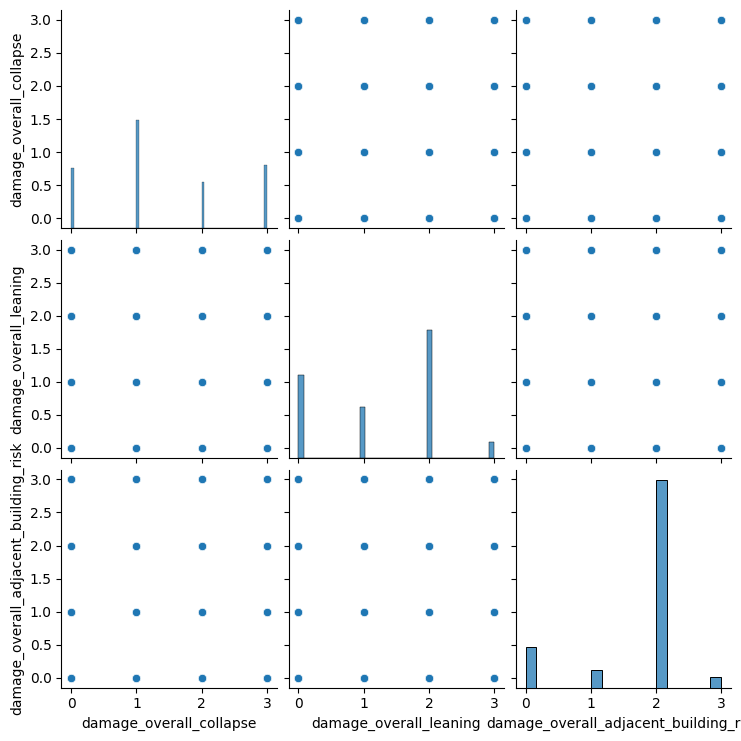

In [41]:

damage_types = damage[['damage_overall_collapse', 'damage_overall_leaning', 'damage_overall_adjacent_building_risk']]

damage_types_encoded = damage_types.apply(lambda x: x.astype('category').cat.codes)

sns.pairplot(damage_types_encoded)
plt.show()

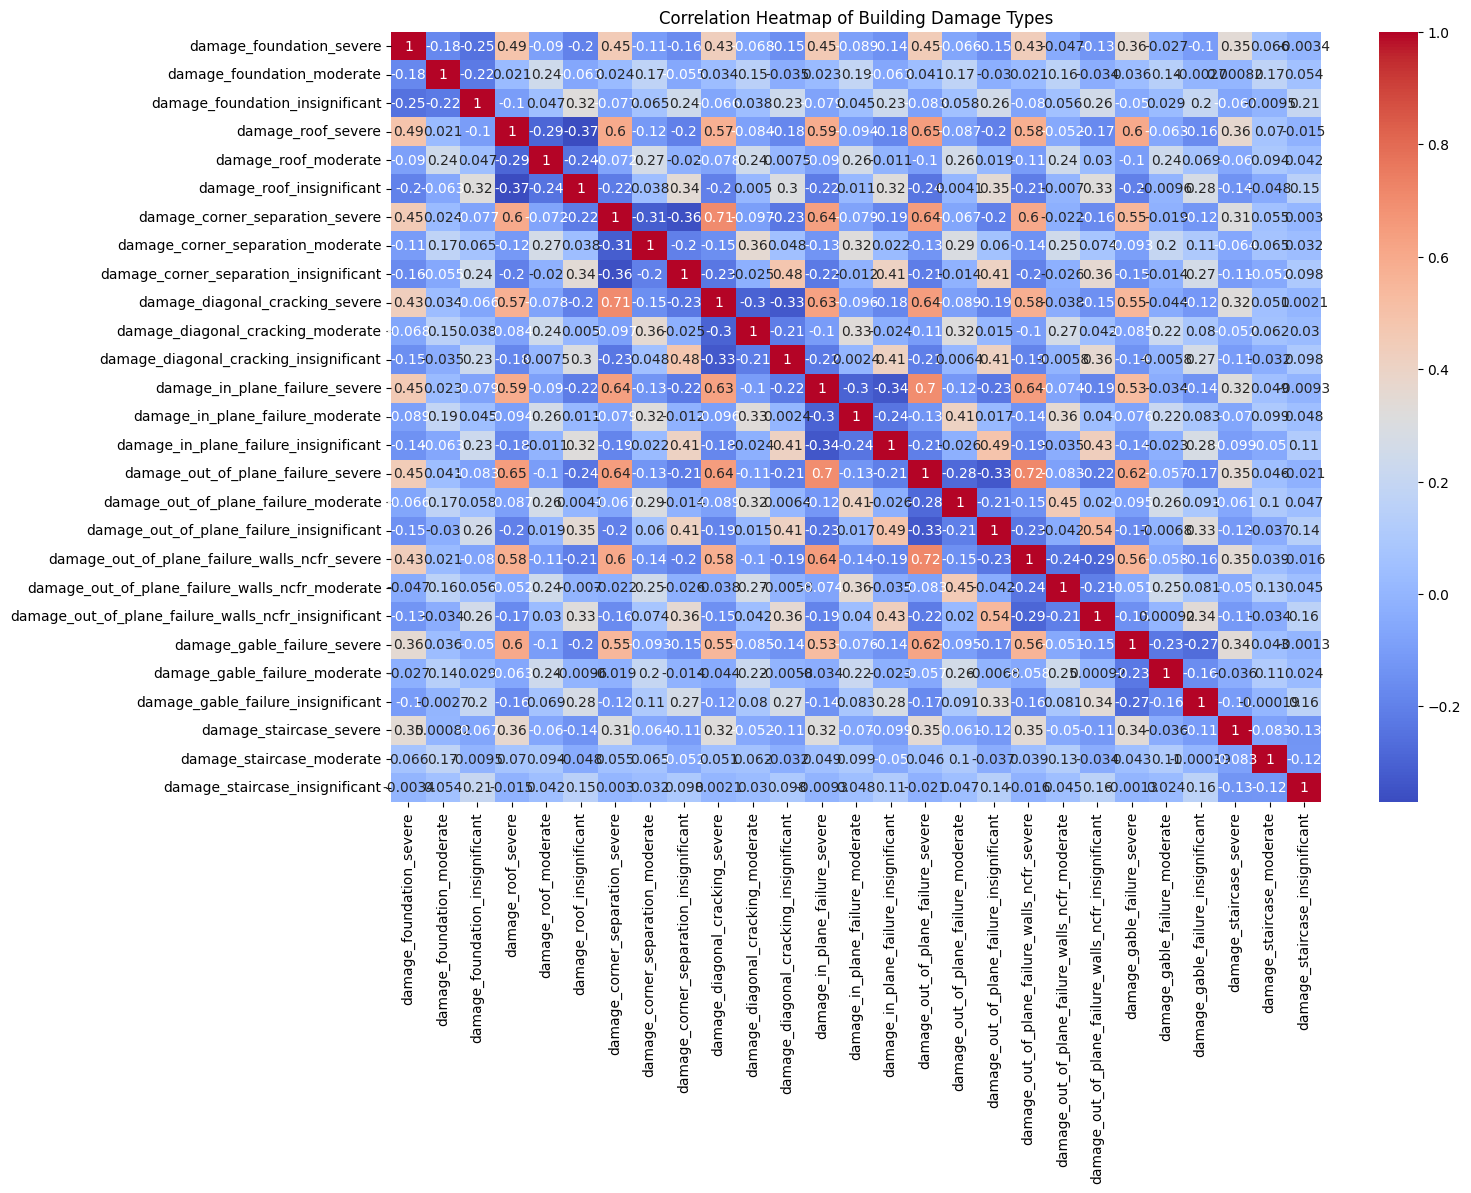

In [48]:

damage_columns = [
    'damage_foundation_severe', 'damage_foundation_moderate', 'damage_foundation_insignificant',
    'damage_roof_severe', 'damage_roof_moderate', 'damage_roof_insignificant',
    'damage_corner_separation_severe', 'damage_corner_separation_moderate', 'damage_corner_separation_insignificant',
    'damage_diagonal_cracking_severe', 'damage_diagonal_cracking_moderate', 'damage_diagonal_cracking_insignificant',
    'damage_in_plane_failure_severe', 'damage_in_plane_failure_moderate', 'damage_in_plane_failure_insignificant',
    'damage_out_of_plane_failure_severe', 'damage_out_of_plane_failure_moderate', 'damage_out_of_plane_failure_insignificant',
    'damage_out_of_plane_failure_walls_ncfr_severe', 'damage_out_of_plane_failure_walls_ncfr_moderate', 'damage_out_of_plane_failure_walls_ncfr_insignificant',
    'damage_gable_failure_severe', 'damage_gable_failure_moderate', 'damage_gable_failure_insignificant',
    'damage_staircase_severe', 'damage_staircase_moderate', 'damage_staircase_insignificant'
]


damage_corr = damage[damage_columns].apply(lambda x: x.astype('category').cat.codes).corr()

plt.figure(figsize=(15, 10))
sns.heatmap(damage_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Building Damage Types')
plt.show()



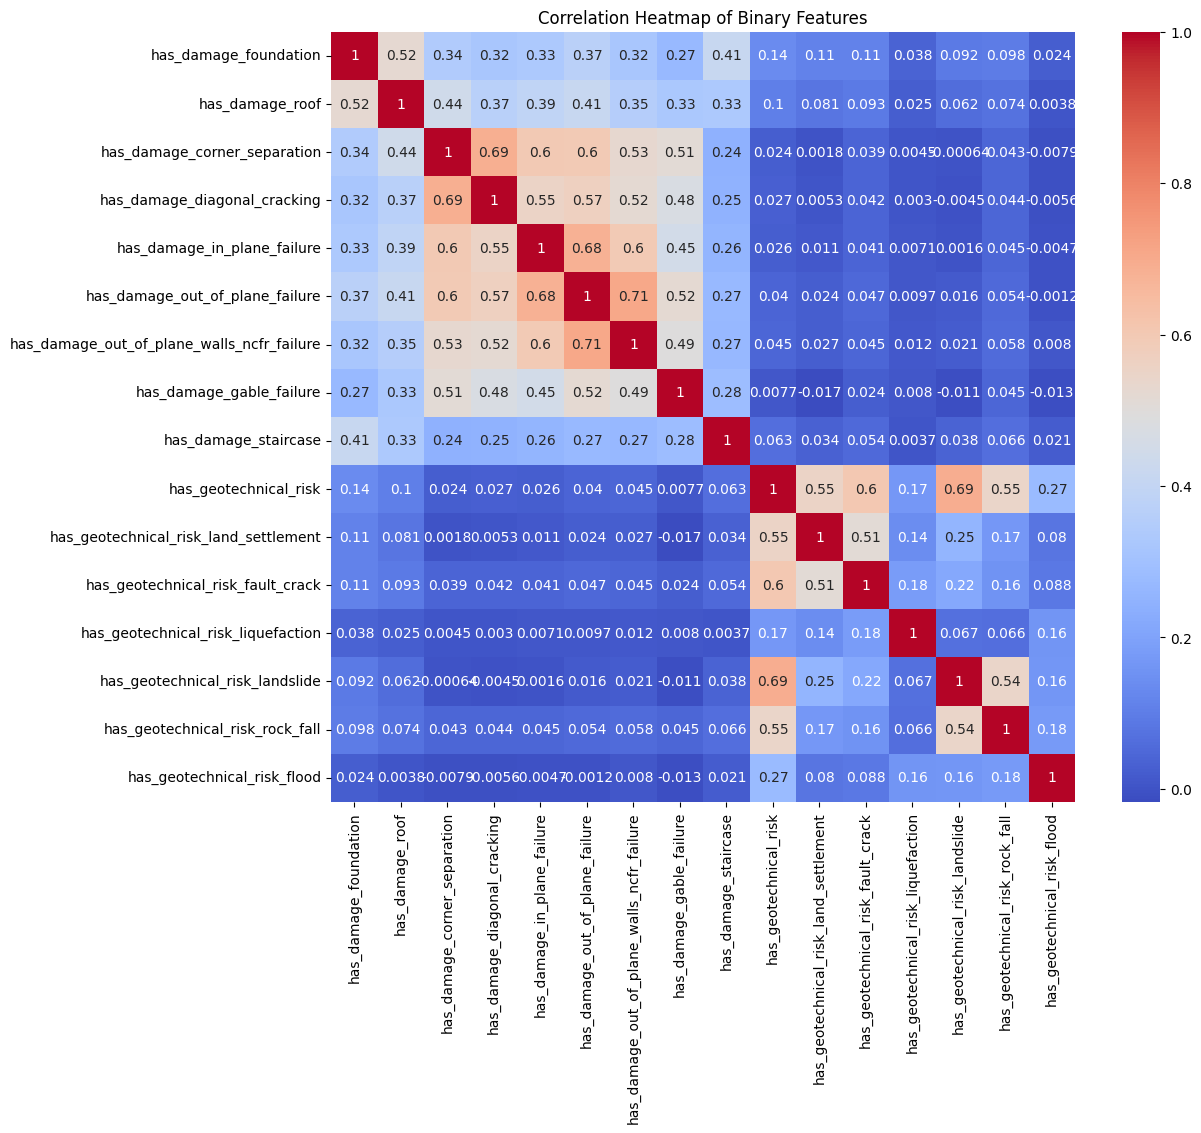

In [50]:

binary_features = [
    'has_damage_foundation', 'has_damage_roof', 'has_damage_corner_separation',
    'has_damage_diagonal_cracking', 'has_damage_in_plane_failure',
    'has_damage_out_of_plane_failure', 'has_damage_out_of_plane_walls_ncfr_failure',
    'has_damage_gable_failure', 'has_damage_staircase', 'has_geotechnical_risk',
    'has_geotechnical_risk_land_settlement', 'has_geotechnical_risk_fault_crack',
    'has_geotechnical_risk_liquefaction', 'has_geotechnical_risk_landslide',
    'has_geotechnical_risk_rock_fall', 'has_geotechnical_risk_flood'
]


binary_corr = damage[binary_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(binary_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Binary Features')
plt.show()

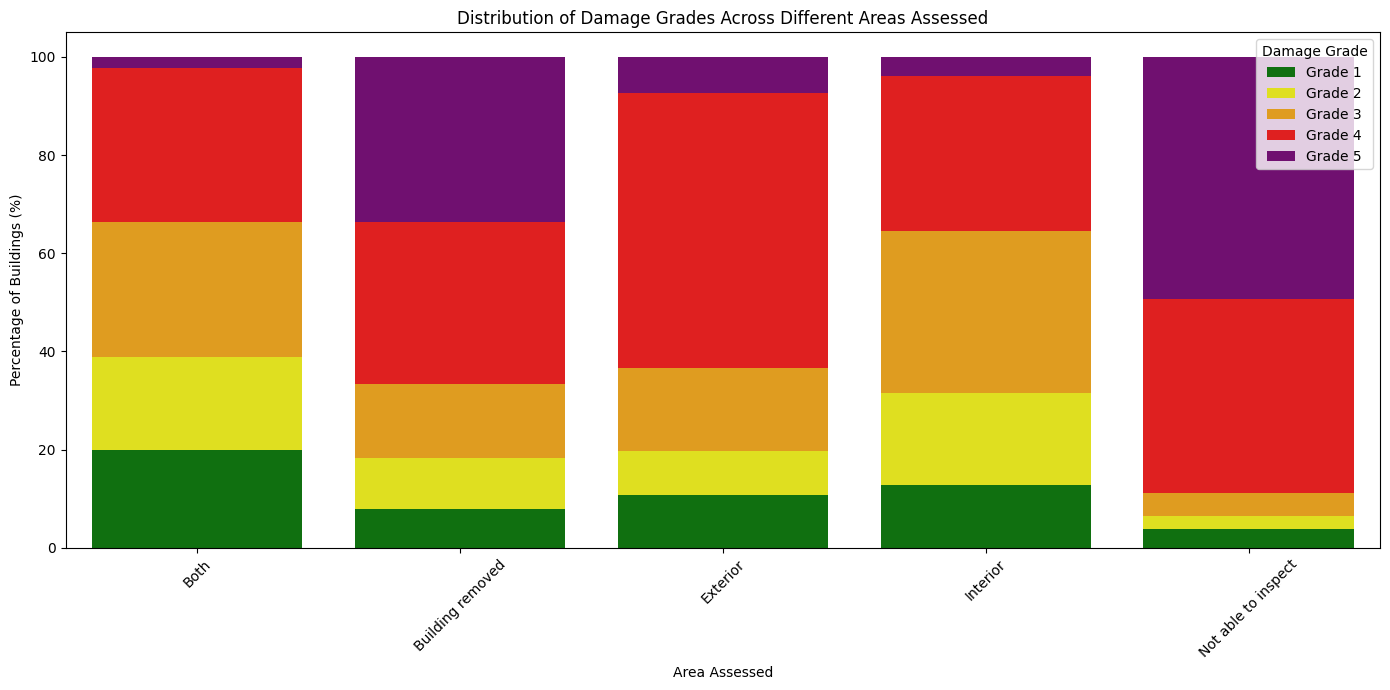

In [97]:

area_assesed_damage_percent = pd.crosstab(damage['area_assesed'], damage['damage_grade'], normalize='index') * 100

plt.figure(figsize=(14, 7))
sns.barplot(data=area_assesed_damage_percent.reset_index(), x='area_assesed', y=1, color='green', label='Grade 1')
sns.barplot(data=area_assesed_damage_percent.reset_index(), x='area_assesed', y=2, color='yellow', label='Grade 2', bottom=area_assesed_damage_percent[1])
sns.barplot(data=area_assesed_damage_percent.reset_index(), x='area_assesed', y=3, color='orange', label='Grade 3', bottom=area_assesed_damage_percent[1]+area_assesed_damage_percent[2])
sns.barplot(data=area_assesed_damage_percent.reset_index(), x='area_assesed', y=4, color='red', label='Grade 4', bottom=area_assesed_damage_percent[1]+area_assesed_damage_percent[2]+area_assesed_damage_percent[3])
sns.barplot(data=area_assesed_damage_percent.reset_index(), x='area_assesed', y=5, color='purple', label='Grade 5', bottom=area_assesed_damage_percent[1]+area_assesed_damage_percent[2]+area_assesed_damage_percent[3]+area_assesed_damage_percent[4])

plt.title('Distribution of Damage Grades Across Different Areas Assessed')
plt.xlabel('Area Assessed')
plt.ylabel('Percentage of Buildings (%)')
plt.legend(title='Damage Grade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


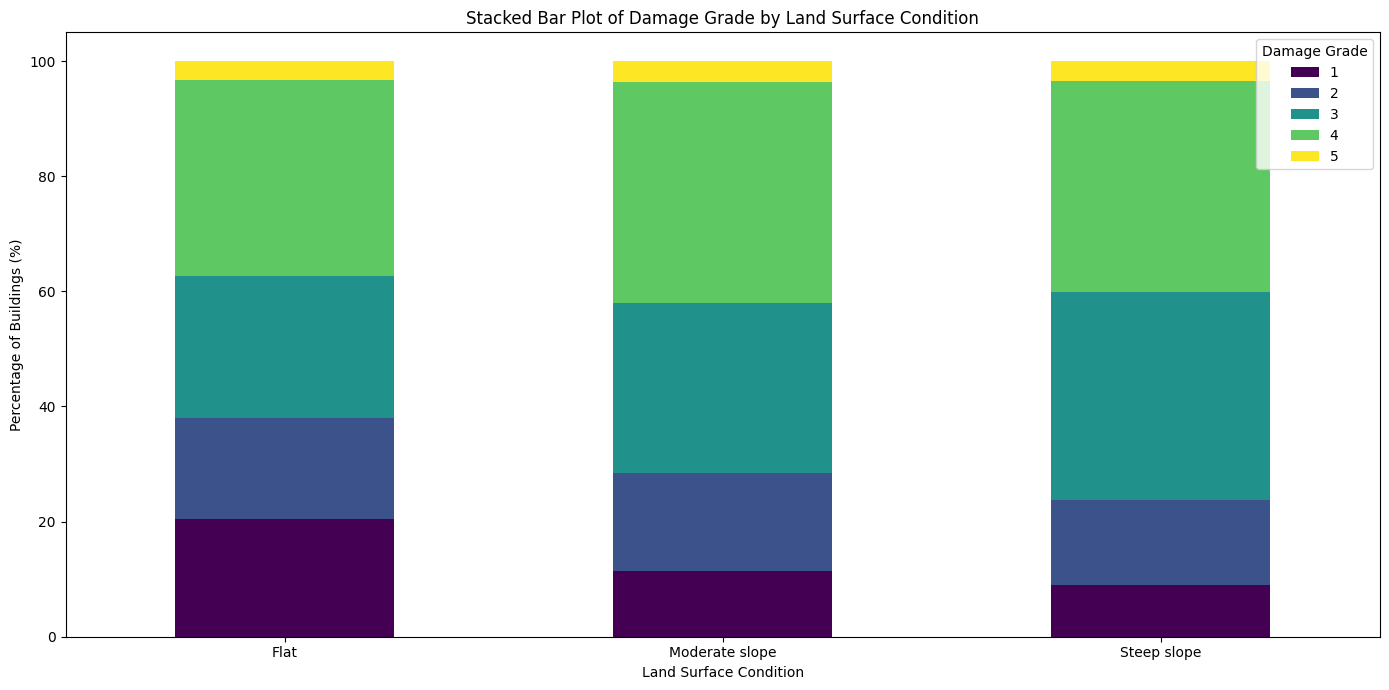

In [100]:

land_surface_damage = pd.crosstab(damage['land_surface_condition'], damage['damage_grade'])

land_surface_damage_percent = land_surface_damage.div(land_surface_damage.sum(axis=1), axis=0) * 100

land_surface_damage_percent.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
plt.title('Stacked Bar Plot of Damage Grade by Land Surface Condition')
plt.xlabel('Land Surface Condition')
plt.ylabel('Percentage of Buildings (%)')
plt.legend(title='Damage Grade')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()


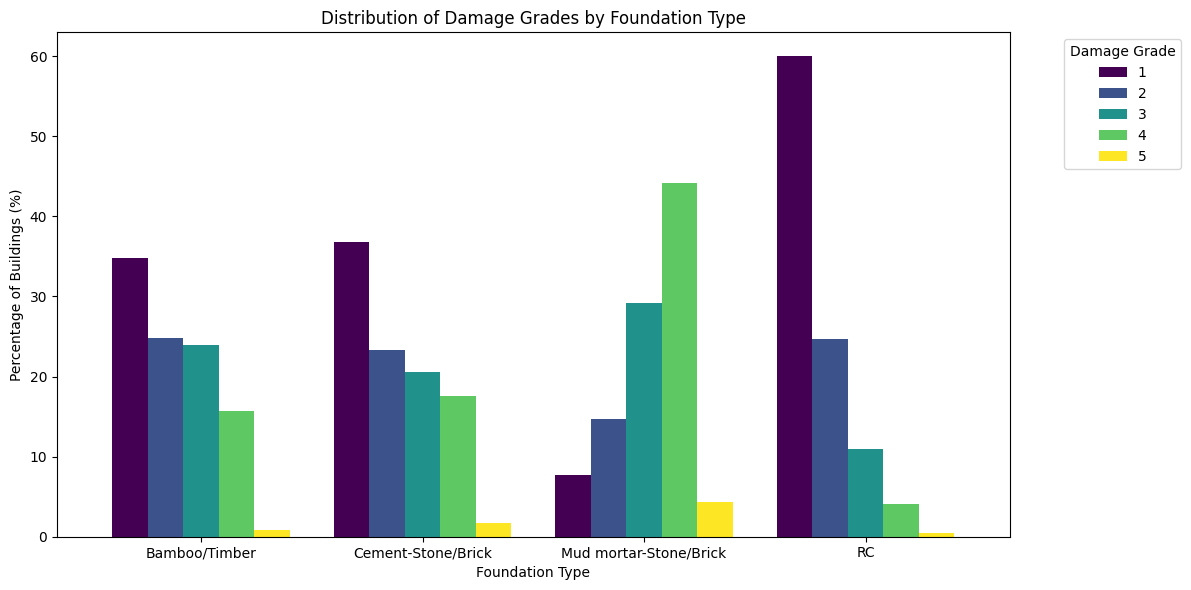

In [104]:
land_surface_damage_percent = pd.crosstab(damage['foundation_type'], damage['damage_grade'], normalize='index') * 100

land_surface_damage_percent.plot(kind='bar', figsize=(12, 6), width=0.8, colormap='viridis')
plt.title('Distribution of Damage Grades by Foundation Type')
plt.xlabel('Foundation Type')
plt.ylabel('Percentage of Buildings (%)')
plt.xticks(rotation=0)
plt.legend(title='Damage Grade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

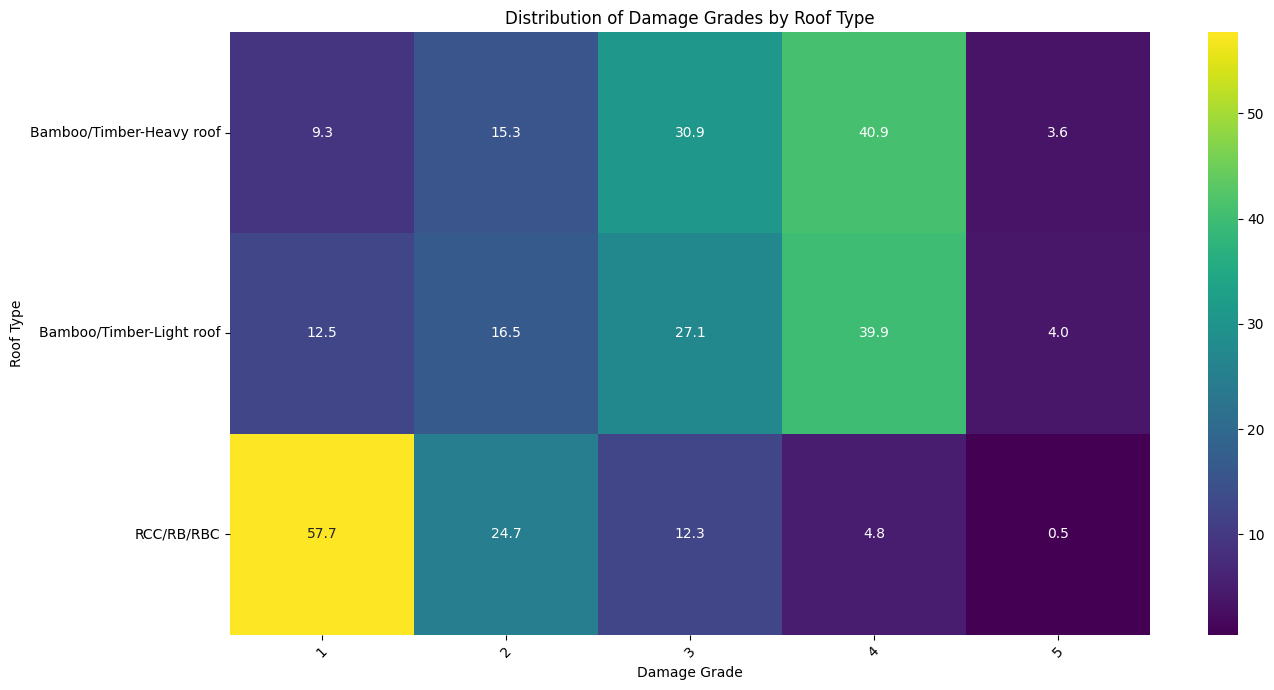

In [107]:

roof_damage_percent = pd.crosstab(damage['roof_type'], damage['damage_grade'], normalize='index') * 100

plt.figure(figsize=(14, 7))
ax = sns.heatmap(data=roof_damage_percent, annot=True, fmt=".1f", cmap='viridis')
plt.title('Distribution of Damage Grades by Roof Type')
plt.xlabel('Damage Grade')
plt.ylabel('Roof Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

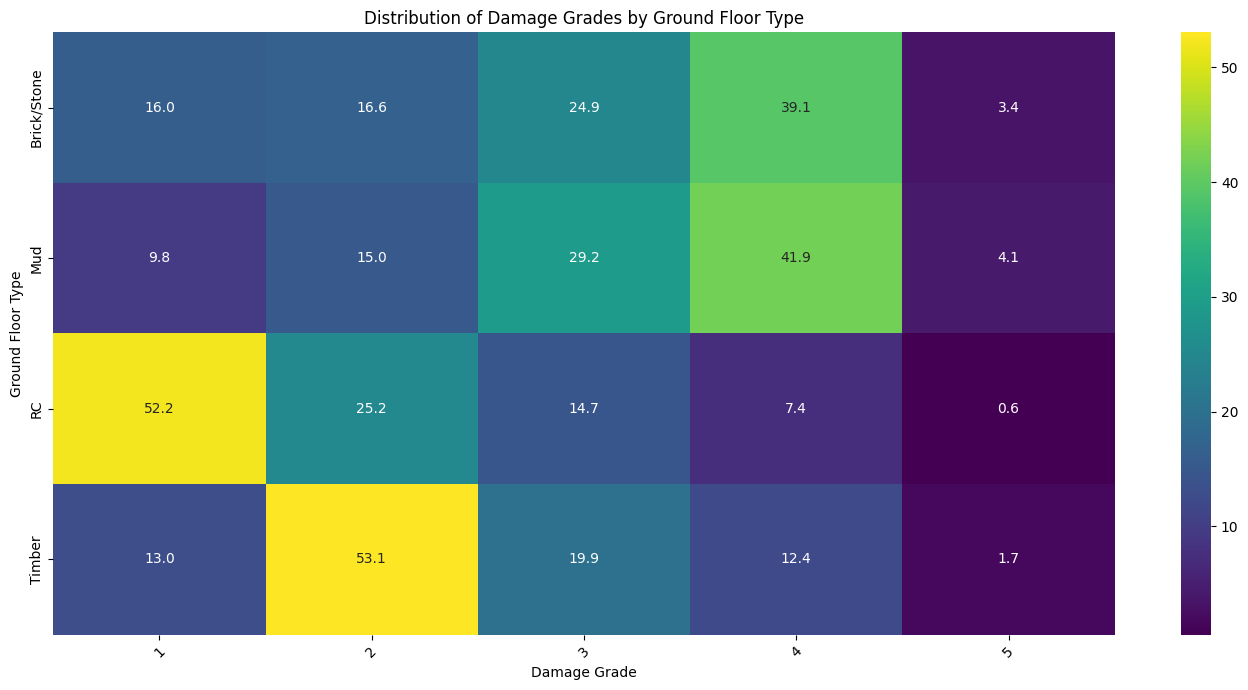

In [108]:

ground_floor_damage_percent = pd.crosstab(damage['ground_floor_type'], damage['damage_grade'], normalize='index') * 100

plt.figure(figsize=(14, 7))
ax = sns.heatmap(data=ground_floor_damage_percent, annot=True, fmt=".1f", cmap='viridis')
plt.title('Distribution of Damage Grades by Ground Floor Type')
plt.xlabel('Damage Grade')
plt.ylabel('Ground Floor Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [109]:
damage.plan_configuration.value_counts()

plan_configuration
Rectangular                        117171
Square                               2834
L-shape                              2044
Multi-projected                       262
T-shape                               179
U-shape                               101
E-shape                                26
Building with Central Courtyard        25
H-shape                                17
Name: count, dtype: int64

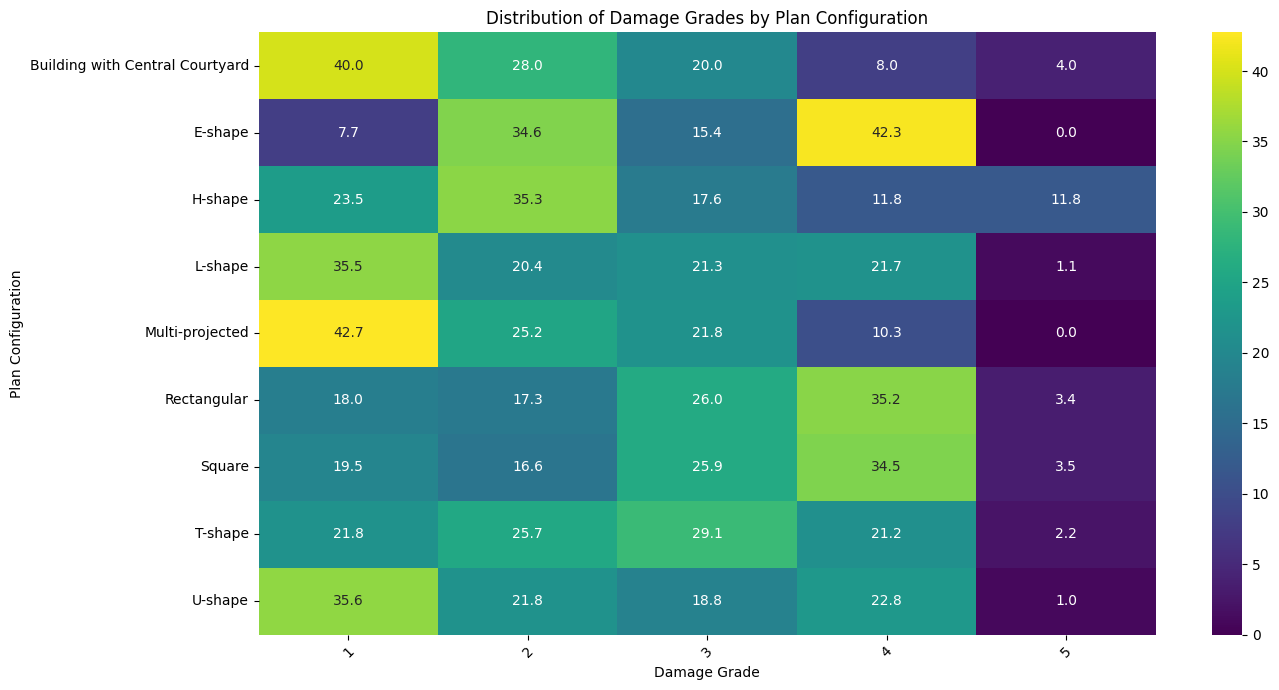

In [110]:

plan_config_damage_percent = pd.crosstab(damage['plan_configuration'], damage['damage_grade'], normalize='index') * 100

plt.figure(figsize=(14, 7))
ax = sns.heatmap(data=plan_config_damage_percent, annot=True, fmt=".1f", cmap='viridis')
plt.title('Distribution of Damage Grades by Plan Configuration')
plt.xlabel('Damage Grade')
plt.ylabel('Plan Configuration')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [112]:
damage.condition_post_eq.value_counts()

condition_post_eq
Damaged-Not used             48031
Damaged-Used in risk         29917
Damaged-Repaired and used    26652
Not damaged                  18059
Name: count, dtype: int64

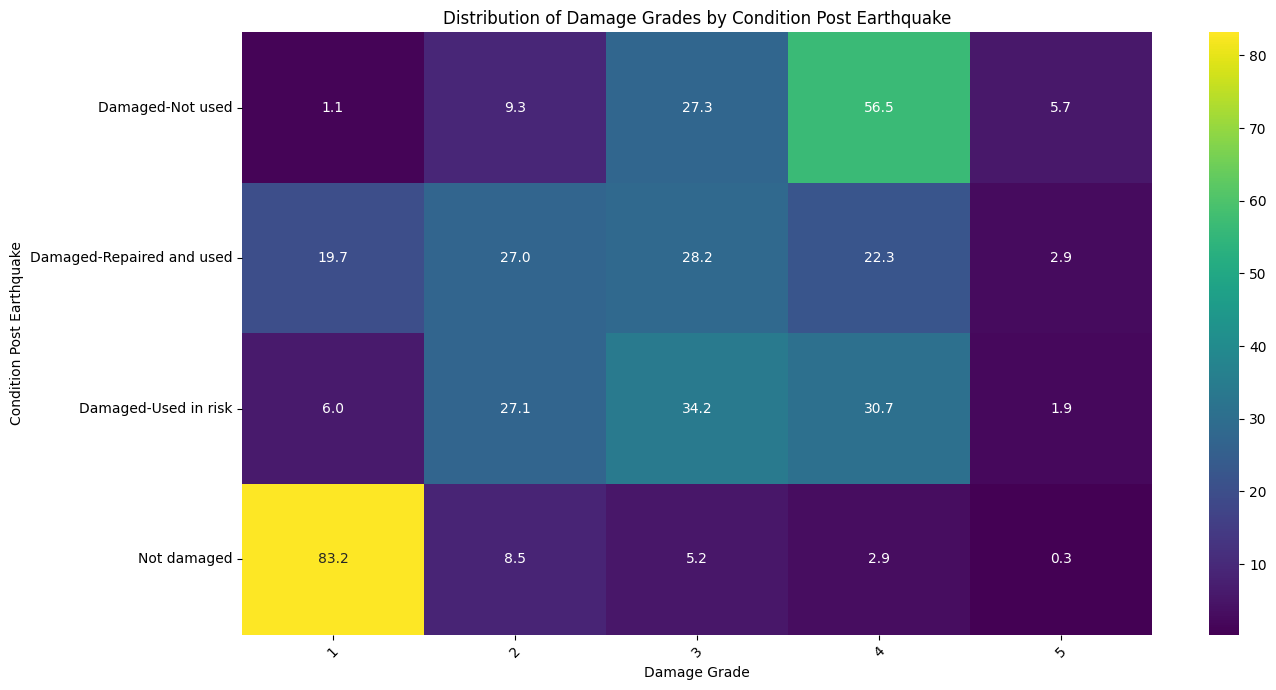

In [113]:

condition_post_eq_damage_percent = pd.crosstab(damage['condition_post_eq'], damage['damage_grade'], normalize='index') * 100

plt.figure(figsize=(14, 7))
ax = sns.heatmap(data=condition_post_eq_damage_percent, annot=True, fmt=".1f", cmap='viridis')
plt.title('Distribution of Damage Grades by Condition Post Earthquake')
plt.xlabel('Damage Grade')
plt.ylabel('Condition Post Earthquake')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [114]:
damage.technical_solution_proposed.value_counts()

technical_solution_proposed
Reconstruction    47048
Major repair      31469
Minor repair      29431
No need           14711
Name: count, dtype: int64

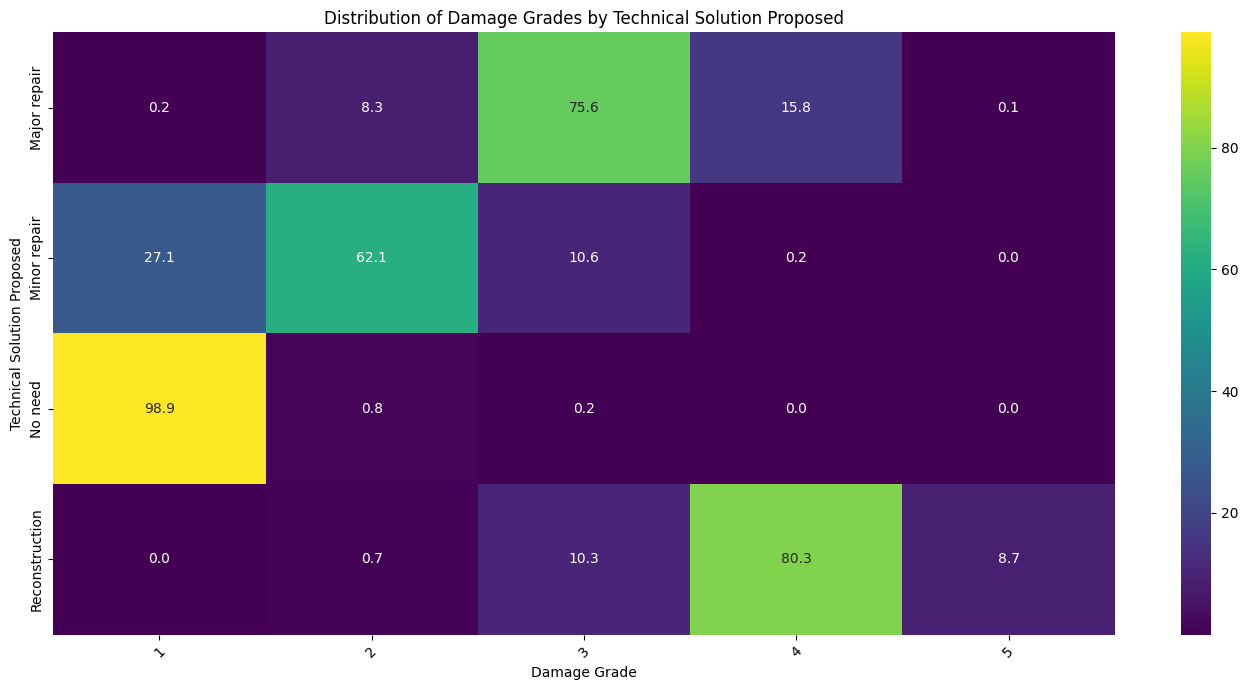

In [133]:

tech_solution_damage_percent = pd.crosstab(damage['technical_solution_proposed'], damage['damage_grade'], normalize='index') * 100

plt.figure(figsize=(14, 7))
ax = sns.heatmap(data=tech_solution_damage_percent, annot=True, fmt=".1f", cmap='viridis')
plt.title('Distribution of Damage Grades by Technical Solution Proposed')
plt.xlabel('Damage Grade')
plt.ylabel('Technical Solution Proposed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()